In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [31]:
dataset = "../catalunya.csv"

In [32]:
data = pd.read_csv(dataset)

In [33]:
data.head()

,# x_m,y_m,w_tr_right_m,w_tr_left_m
0,-0.473164,0.749307,5.894,5.830
1,-3.182628,-3.451582,5.889,5.830
2,-5.891900,-7.652591,5.884,5.831
3,-8.600990,-11.853714,5.879,5.831
4,-11.309913,-16.054943,5.875,5.832


In [34]:
data_np = data.to_numpy()

In [45]:
data_np_scaled = data_np

In [46]:
data_np_scaled

array([[-0.473164,  0.749307,  5.894   ,  5.83    ],
       [-3.182628, -3.451582,  5.889   ,  5.83    ],
       [-5.8919  , -7.652591,  5.884   ,  5.831   ],
       ...,
       [ 7.656518, 13.351163,  5.908   ,  5.829   ],
       [ 4.946397,  9.150687,  5.903   ,  5.829   ],
       [ 2.236507,  4.950065,  5.898   ,  5.83    ]])

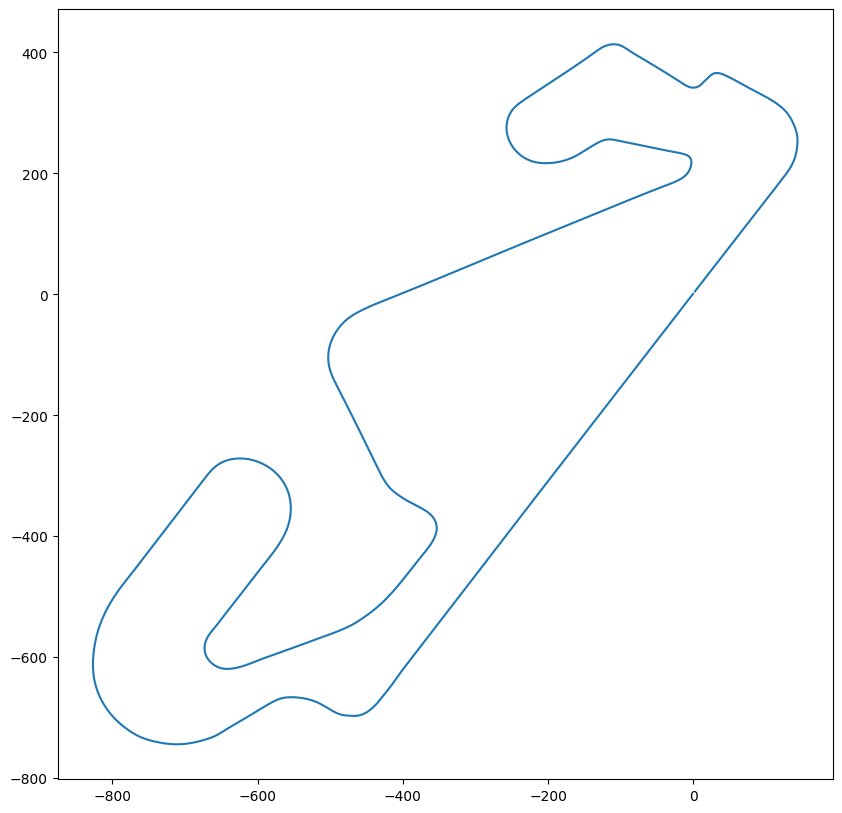

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(data_np_scaled[:, 0], data_np_scaled[:, 1])

In [48]:
left_side_boundary = data_np_scaled[:, 0] - data_np_scaled[:, 2]

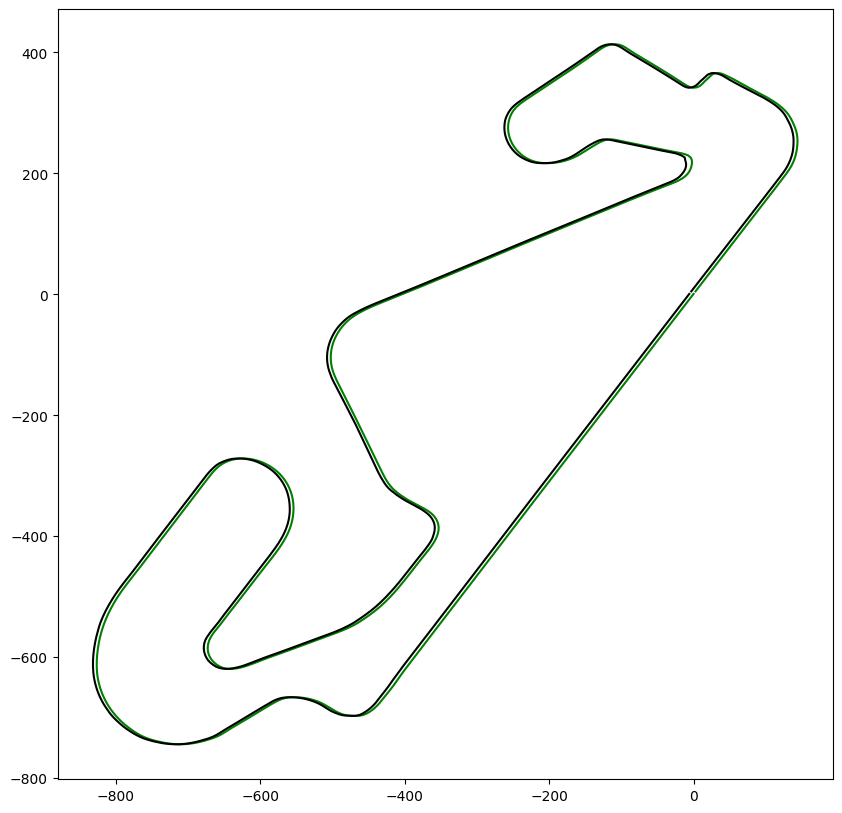

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(data_np_scaled[:, 0], data_np_scaled[:, 1], color="green")
ax.plot(left_side_boundary, data_np_scaled[:, 1], color="black")

In [50]:
right_size_boundary = data_np_scaled[:, 0] + data_np_scaled[:, 3]

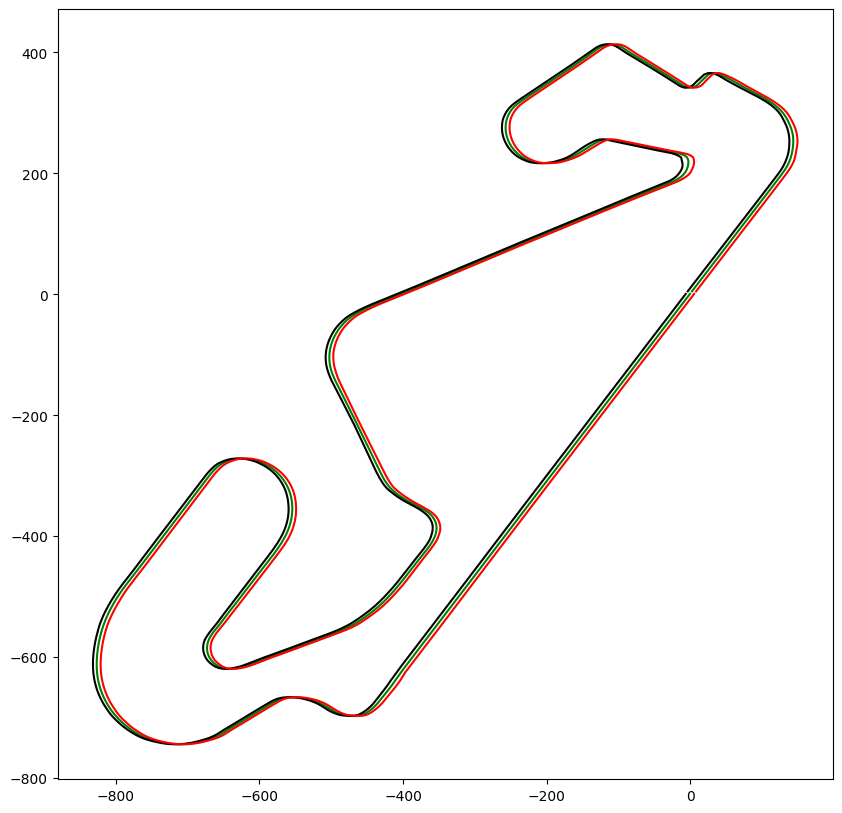

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(data_np_scaled[:, 0], data_np_scaled[:, 1], color="green")
ax.plot(left_side_boundary, data_np_scaled[:, 1], color="black")
ax.plot(right_size_boundary, data_np_scaled[:, 1], color="red")

In [55]:
plt.savefig("catalunya.png")

<Figure size 640x480 with 0 Axes>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_race_track(csv_file_path):
    """
    Plots the race track from a CSV file containing centerline coordinates and track widths.

    Parameters:
    csv_file_path (str): Path to the CSV file containing the track data.

    The CSV file is expected to have the following columns:
    - x_m: X-coordinate in meters.
    - y_m: Y-coordinate in meters.
    - w_tr_right_m: Track width to the right of the centerline in meters.
    - w_tr_left_m: Track width to the left of the centerline in meters.
    """
    # Load the CSV data, ensuring the header is recognized
    df = pd.read_csv(csv_file_path)

    X = "# x_m"
    Y = "y_m"
    wLeft = "w_tr_left_m"
    wRight = "w_tr_right_m"

    # Compute the direction vectors (dx, dy) along the centerline
    dx = np.diff(X, append=X.iloc[0])
    dy = np.diff(df[Y], append=df[Y].iloc[0])
    norms = np.sqrt(dx**2 + dy**2)
    dx /= norms
    dy /= norms

    # Calculate normal vectors (nx, ny) perpendicular to the centerline
    nx = -dy
    ny = dx

    # Compute the coordinates of the left and right boundaries
    left_boundary_x = X + nx * df[wLeft]
    left_boundary_y = df[Y] + ny * df[wLeft]
    right_boundary_x = X - nx * df[wRight]
    right_boundary_y = df[Y] - ny * df[wRight]

    # start location
    start_location = [X[0], df[Y][0]]
    print(start_location)

    # Plot the track
    plt.figure(figsize=(10, 10))
    plt.plot(X, df[Y], 'k--', label='Centerline')
    plt.plot(left_boundary_x, left_boundary_y, 'r-', label='Left Boundary')
    plt.plot(right_boundary_x, right_boundary_y, 'b-', label='Right Boundary')
    plt.axis('equal')
    plt.xlabel('X Coordinate (m)')
    plt.ylabel('Y Coordinate (m)')
    plt.title('Race Track Visualization')
    plt.legend()
    plt.show()

[-0.473164, 0.749307]


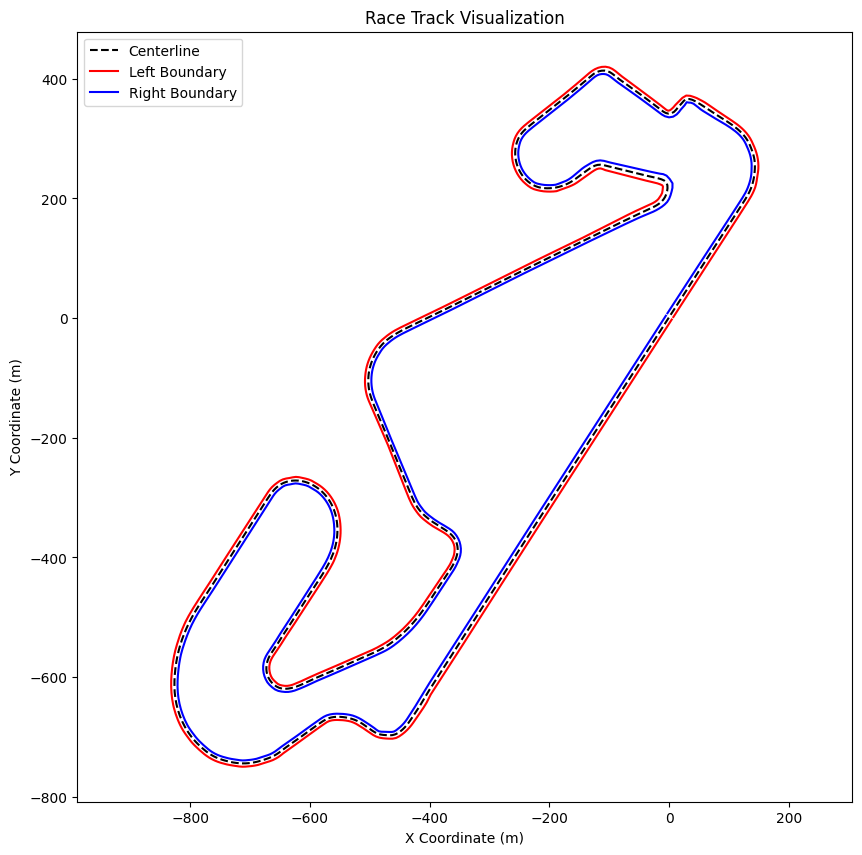

In [75]:
plot_race_track(dataset)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_race_track_rotated(csv_file_path):
    """
    Plots the race track from a CSV file containing centerline coordinates and track widths,
    aligning the first two points parallel to the x-axis.

    Parameters:
    csv_file_path (str): Path to the CSV file containing the track data.

    The CSV file is expected to have the following columns:
    - '# x_m': X-coordinate in meters.
    - 'y_m': Y-coordinate in meters.
    - 'w_tr_right_m': Track width to the right of the centerline in meters.
    - 'w_tr_left_m': Track width to the left of the centerline in meters.
    """
    # Load the CSV data, ensuring the header is recognized
    df = pd.read_csv(csv_file_path)

    # Define column names
    X = "# x_m"
    Y = "y_m"
    wLeft = "w_tr_left_m"
    wRight = "w_tr_right_m"

    # Extract the first two points
    x1, y1 = X.iloc[0], df[Y].iloc[0]
    x2, y2 = X.iloc[1], df[Y].iloc[1]

    # Calculate the angle to rotate
    delta_x = x2 - x1
    delta_y = y2 - y1
    angle = np.arctan2(delta_y, delta_x)

    # Create the rotation matrix
    cos_angle = np.cos(-angle)
    sin_angle = np.sin(-angle)
    rotation_matrix = np.array([[cos_angle, -sin_angle],
                                [sin_angle, cos_angle]])

    # Apply the rotation to all points
    original_points = np.vstack((X - x1, df[Y] - y1))
    rotated_points = rotation_matrix @ original_points
    X, df[Y] = rotated_points[0, :], rotated_points[1, :]

    # Compute the direction vectors (dx, dy) along the centerline
    dx = np.diff(X, append=X.iloc[0])
    dy = np.diff(df[Y], append=df[Y].iloc[0])
    norms = np.sqrt(dx**2 + dy**2)
    dx /= norms
    dy /= norms

    # Calculate normal vectors (nx, ny) perpendicular to the centerline
    nx = -dy
    ny = dx

    # Compute the coordinates of the left and right boundaries
    left_boundary_x = X + nx * df[wLeft]
    left_boundary_y = df[Y] + ny * df[wLeft]
    right_boundary_x = X - nx * df[wRight]
    right_boundary_y = df[Y] - ny * df[wRight]

    # Plot the track
    plt.figure(figsize=(10, 10))
    plt.plot(X, df[Y], 'k--', label='Centerline')
    plt.plot(left_boundary_x, left_boundary_y, 'r-', label='Left Boundary')
    plt.plot(right_boundary_x, right_boundary_y, 'b-', label='Right Boundary')
    plt.axis('equal')
    plt.xlabel('X Coordinate (m)')
    plt.ylabel('Y Coordinate (m)')
    plt.title('Race Track Visualization')
    plt.legend()
    plt.show()

# Example usage:
# plot_race_track('path_to_Catalunya.csv')


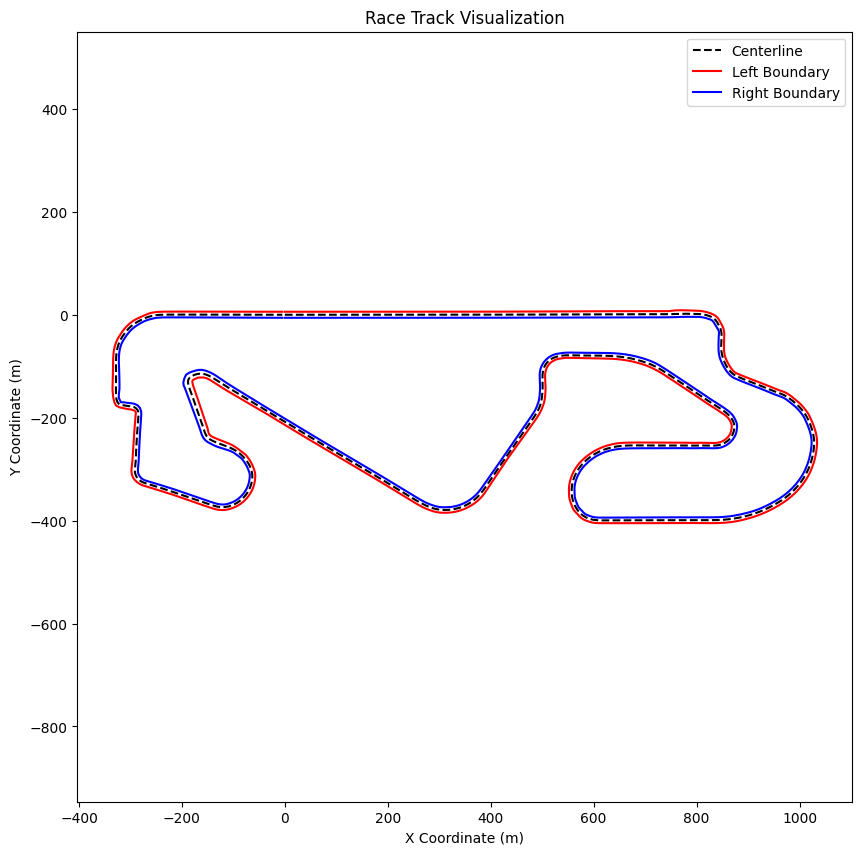

In [78]:
plot_race_track_rotated(dataset)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_race_track(csv_file_path, raceline_file_path):
    """
    Plots the race track from a CSV file containing centerline coordinates and track widths.

    Parameters:
    csv_file_path (str): Path to the CSV file containing the track data.

    The CSV file is expected to have the following columns:
    - x_m: X-coordinate in meters.
    - y_m: Y-coordinate in meters.
    - w_tr_right_m: Track width to the right of the centerline in meters.
    - w_tr_left_m: Track width to the left of the centerline in meters.
    """
    # Load the CSV data, ensuring the header is recognized
    df = pd.read_csv(csv_file_path)
    raceline_df = pd.read_csv(raceline_file_path).to_numpy()

    X = "# x_m"
    Y = "y_m"
    wLeft = "w_tr_left_m"
    wRight = "w_tr_right_m"

    # Compute the direction vectors (dx, dy) along the centerline
    dx = np.diff(X, append=X.iloc[0])
    dy = np.diff(df[Y], append=df[Y].iloc[0])
    norms = np.sqrt(dx**2 + dy**2)
    dx /= norms
    dy /= norms

    # Calculate normal vectors (nx, ny) perpendicular to the centerline
    nx = -dy
    ny = dx

    # Compute the coordinates of the left and right boundaries
    left_boundary_x = X + nx * df[wLeft]
    left_boundary_y = df[Y] + ny * df[wLeft]
    right_boundary_x = X - nx * df[wRight]
    right_boundary_y = df[Y] - ny * df[wRight]

    # start location
    start_location = [X[0], df[Y][0]]
    print(start_location)
    print(raceline_df[:, 0][0], raceline_df[:, 1][1])

    # Plot the track
    plt.figure(figsize=(10, 10))
    plt.plot(X, df[Y], 'k--', label='Centerline')
    plt.plot(raceline_df[:, 0], raceline_df[:, 1], 'green', label='Raceline')
    plt.plot(left_boundary_x, left_boundary_y, 'r-', label='Left Boundary')
    plt.plot(right_boundary_x, right_boundary_y, 'b-', label='Right Boundary')
    plt.axis('equal')
    plt.xlabel('X Coordinate (m)')
    plt.ylabel('Y Coordinate (m)')
    plt.title('Race Track Visualization')
    plt.legend()
    plt.show()

[-0.473164, 0.749307]
2.087604 -5.068545


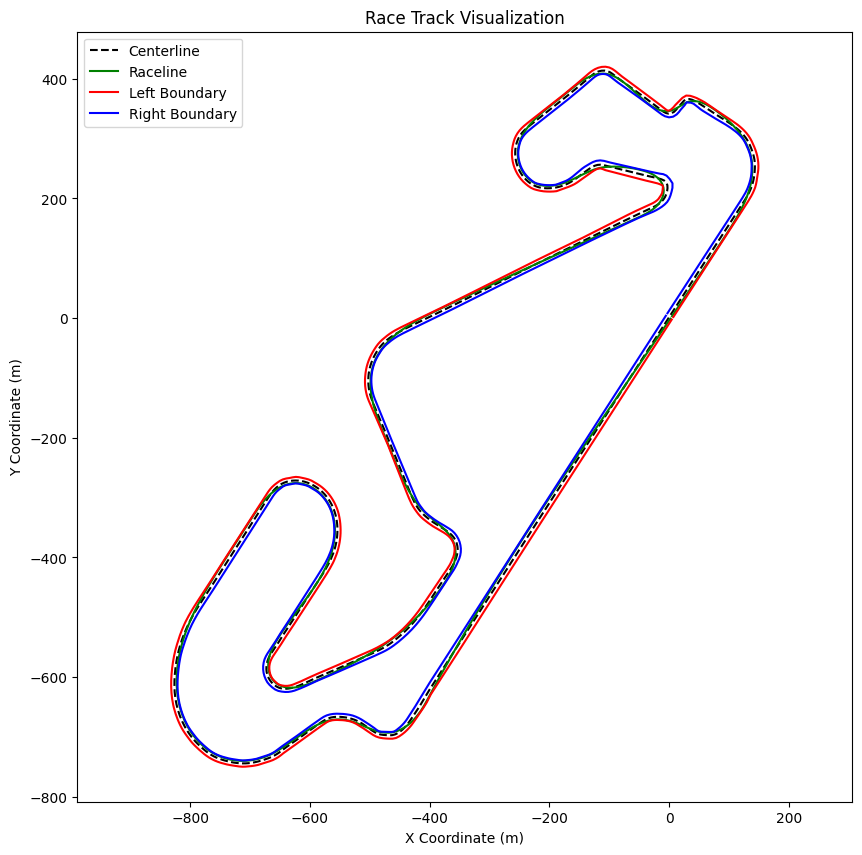

In [94]:
plot_race_track(dataset, "../raceline.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_race_track(csv_file_path, raceline_file_path):
    """
    Plots the race track from a CSV file containing centerline coordinates and track widths.

    Parameters:
    csv_file_path (str): Path to the CSV file containing the track data.

    The CSV file is expected to have the following columns:
    - x_m: X-coordinate in meters.
    - y_m: Y-coordinate in meters.
    - w_tr_right_m: Track width to the right of the centerline in meters.
    - w_tr_left_m: Track width to the left of the centerline in meters.
    """
    # Load the CSV data, ensuring the header is recognized
    df = pd.read_csv(csv_file_path).to_numpy()
    raceline_df = pd.read_csv(raceline_file_path).to_numpy()

    X = df[:, 0]
    Y = df[:, 1]
    wLeft = df[:, 2]
    wRight = df[:, 3]

    # Compute the direction vectors (dx, dy) along the centerline
    dx = np.diff(X, append=X[0])
    dy = np.diff(df[Y], append=df[Y].iloc[0])
    norms = np.sqrt(dx**2 + dy**2)
    dx /= norms
    dy /= norms

    # Calculate normal vectors (nx, ny) perpendicular to the centerline
    nx = -dy
    ny = dx

    # Compute the coordinates of the left and right boundaries
    left_boundary_x = X + nx * df[wLeft]
    left_boundary_y = df[Y] + ny * df[wLeft]
    right_boundary_x = X - nx * df[wRight]
    right_boundary_y = df[Y] - ny * df[wRight]

    # start location
    start_location = [X[0], df[Y][0]]
    print(start_location)
    print(raceline_df[:, 0][0], raceline_df[:, 1][1])

    # Plot the track
    plt.figure(figsize=(10, 10))
    plt.plot(X, df[Y], 'k--', label='Centerline')
    plt.plot(raceline_df[:, 0], raceline_df[:, 1], 'green', label='Raceline')
    plt.plot(left_boundary_x, left_boundary_y, 'r-', label='Left Boundary')
    plt.plot(right_boundary_x, right_boundary_y, 'b-', label='Right Boundary')
    plt.axis('equal')
    plt.xlabel('X Coordinate (m)')
    plt.ylabel('Y Coordinate (m)')
    plt.title('Race Track Visualization')
    plt.legend()
    plt.show()

In [95]:
import numpy as np
import matplotlib.pyplot as plt

def plot_race_track(csv_file_path, raceline_file_path):
    """
    Plots the race track from a CSV file containing centerline coordinates and track widths,
    along with an optional raceline.

    Parameters:
    csv_file_path (str): Path to the CSV file containing the track data.
    raceline_file_path (str): Path to the CSV file containing the raceline data.

    The track CSV file is expected to have the following columns:
    - x_m: X-coordinate in meters.
    - y_m: Y-coordinate in meters.
    - w_tr_right_m: Track width to the right of the centerline in meters.
    - w_tr_left_m: Track width to the left of the centerline in meters.

    The raceline CSV file is expected to have the following columns:
    - x_m: X-coordinate in meters.
    - y_m: Y-coordinate in meters.
    """
    # Load the track data
    track_data = np.loadtxt(csv_file_path, delimiter=',', skiprows=1)
    X = track_data[:, 0]  # x_m
    Y = track_data[:, 1]  # y_m
    wLeft = track_data[:, 3]  # w_tr_left_m
    wRight = track_data[:, 2]  # w_tr_right_m

    # Load the raceline data
    raceline_data = np.loadtxt(raceline_file_path, delimiter=',', skiprows=1)
    raceline_X = raceline_data[:, 0]  # x_m
    raceline_Y = raceline_data[:, 1]  # y_m

    # Compute the direction vectors (dx, dy) along the centerline
    dx = np.diff(X, append=X[0])
    dy = np.diff(Y, append=Y[0])
    norms = np.sqrt(dx**2 + dy**2)
    dx /= norms
    dy /= norms

    # Calculate normal vectors (nx, ny) perpendicular to the centerline
    nx = -dy
    ny = dx

    # Compute the coordinates of the left and right boundaries
    left_boundary_x = X + nx * wLeft
    left_boundary_y = Y + ny * wLeft
    right_boundary_x = X - nx * wRight
    right_boundary_y = Y - ny * wRight

    # Plot the track
    plt.figure(figsize=(10, 10))
    plt.plot(X, Y, 'k--', label='Centerline')
    plt.plot(raceline_X, raceline_Y, 'g-', label='Raceline')
    plt.plot(left_boundary_x, left_boundary_y, 'r-', label='Left Boundary')
    plt.plot(right_boundary_x, right_boundary_y, 'b-', label='Right Boundary')
    plt.axis('equal')
    plt.xlabel('X Coordinate (m)')
    plt.ylabel('Y Coordinate (m)')
    plt.title('Race Track Visualization')
    plt.legend()
    plt.show()

# Example usage:
# plot_race_track('path_to_Catalunya.csv', 'path_to_raceline.csv')


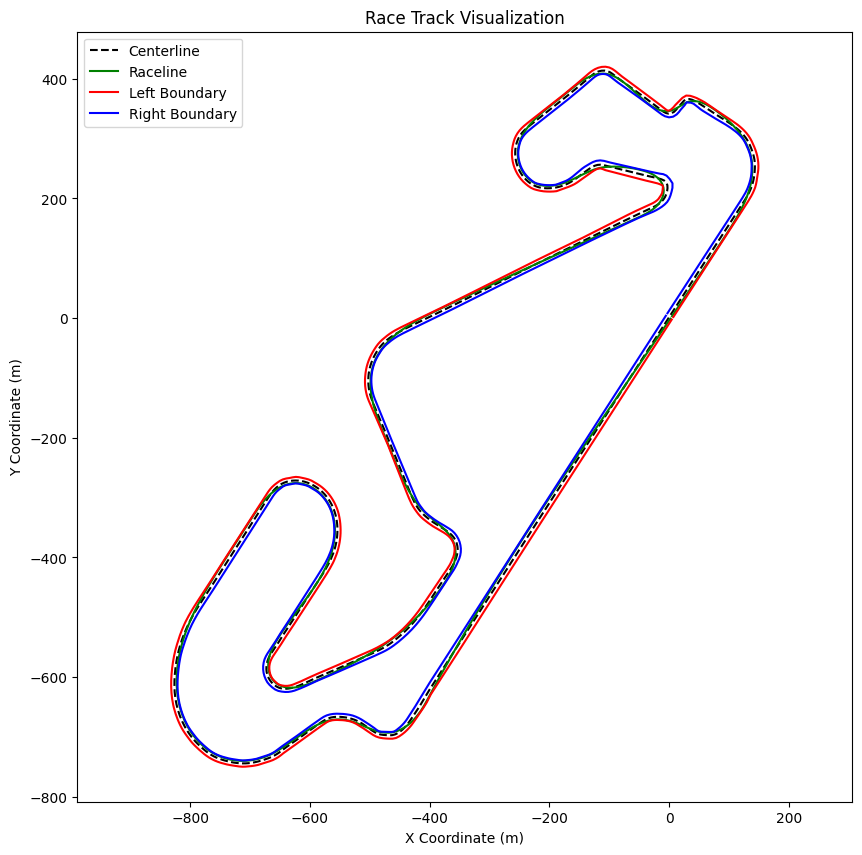

In [96]:
plot_race_track(dataset, "../raceline.csv")

In [103]:
import numpy as np
import matplotlib.pyplot as plt

def plot_race_track(csv_file_path, raceline_file_path, scale_factor):
    """
    Plots the scaled race track from CSV files containing centerline coordinates, track widths, and raceline data.

    Parameters:
    - csv_file_path (str): Path to the CSV file containing the track data.
    - raceline_file_path (str): Path to the CSV file containing the raceline data.
    - scale_factor (float): Factor by which to scale the track dimensions.
    """
    # Load the track data
    track_data = np.loadtxt(csv_file_path, delimiter=',', skiprows=1)
    X = track_data[:, 0]  # x_m
    Y = track_data[:, 1]  # y_m
    wLeft = track_data[:, 3]  # w_tr_left_m
    wRight = track_data[:, 2]  # w_tr_right_m

    # Load the raceline data
    raceline_data = np.loadtxt(raceline_file_path, delimiter=',', skiprows=1)
    raceline_X = raceline_data[:, 0]  # x_m
    raceline_Y = raceline_data[:, 1]  # y_m

    # Apply the scaling factor
    X *= scale_factor
    Y *= scale_factor
    wLeft *= scale_factor
    wRight *= scale_factor
    raceline_X *= scale_factor
    raceline_Y *= scale_factor

    # Compute the direction vectors (dx, dy) along the centerline
    dx = np.diff(X, append=X[0])
    dy = np.diff(Y, append=Y[0])
    norms = np.sqrt(dx**2 + dy**2)
    dx /= norms
    dy /= norms

    # Calculate normal vectors (nx, ny) perpendicular to the centerline
    nx = -dy
    ny = dx

    # Compute the coordinates of the left and right boundaries
    left_boundary_x = X + nx * wLeft
    left_boundary_y = Y + ny * wLeft
    right_boundary_x = X - nx * wRight
    right_boundary_y = Y - ny * wRight

    # Plot the scaled track
    plt.figure(figsize=(10, 10))
    plt.plot(X, Y, 'k--', label='Centerline')
    plt.plot(raceline_X, raceline_Y, 'g-', label='Raceline')
    plt.plot(left_boundary_x, left_boundary_y, 'r-', label='Left Boundary')
    plt.plot(right_boundary_x, right_boundary_y, 'b-', label='Right Boundary')
    plt.axis('equal')
    plt.xlabel('X Coordinate (scaled)')
    plt.ylabel('Y Coordinate (scaled)')
    plt.title('Scaled Race Track Visualization')
    plt.legend()
    plt.show()

# Example usage:
# plot_race_track('path_to_Catalunya.csv', 'path_to_raceline.csv', scale_factor=0.5)


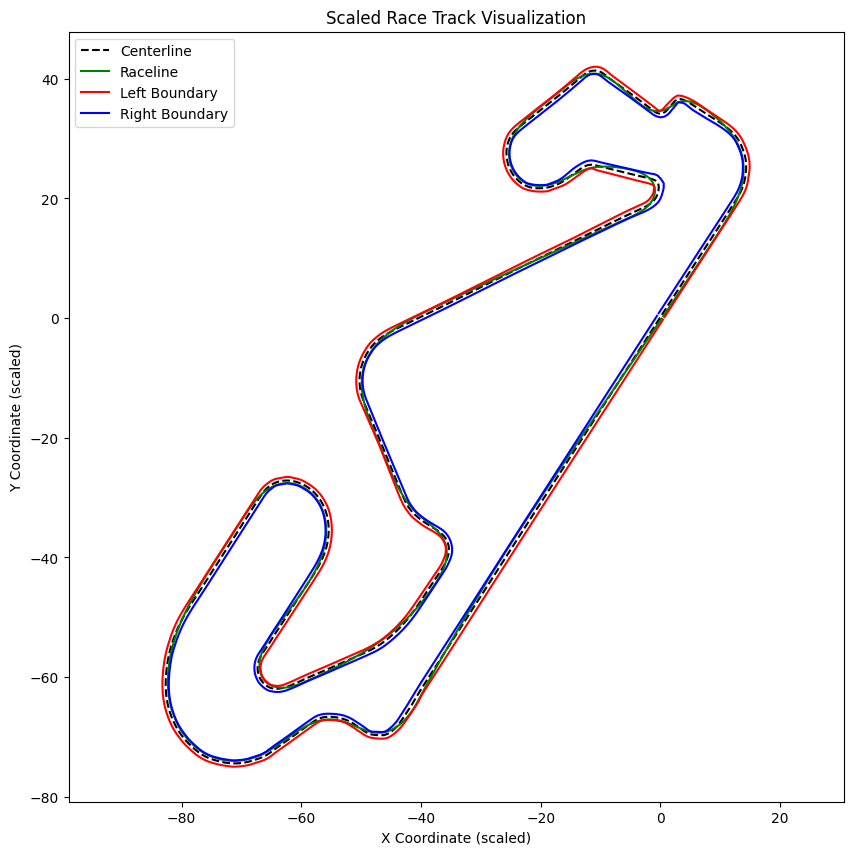

In [104]:
plot_race_track(dataset, "../raceline.csv", 0.1)


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def get_race_track(csv_file_path, raceline_file_path, scale_factor):
    """
    Plots the scaled race track from CSV files containing centerline coordinates, track widths, and raceline data.

    Parameters:
    - csv_file_path (str): Path to the CSV file containing the track data.
    - raceline_file_path (str): Path to the CSV file containing the raceline data.
    - scale_factor (float): Factor by which to scale the track dimensions.
    """
    # Load the track data
    track_data = np.loadtxt(csv_file_path, delimiter=',', skiprows=1)
    X = track_data[:, 0]  # x_m
    Y = track_data[:, 1]  # y_m
    wLeft = track_data[:, 3]  # w_tr_left_m
    wRight = track_data[:, 2]  # w_tr_right_m

    # Load the raceline data
    raceline_data = np.loadtxt(raceline_file_path, delimiter=',', skiprows=1)
    raceline_X = raceline_data[:, 0]  # x_m
    raceline_Y = raceline_data[:, 1]  # y_m

    # Apply the scaling factor
    X *= scale_factor
    Y *= scale_factor
    wLeft *= scale_factor
    wRight *= scale_factor
    raceline_X *= scale_factor
    raceline_Y *= scale_factor

    # Compute the direction vectors (dx, dy) along the centerline
    dx = np.diff(X, append=X[0])
    dy = np.diff(Y, append=Y[0])
    norms = np.sqrt(dx**2 + dy**2)
    dx /= norms
    dy /= norms

    # Calculate normal vectors (nx, ny) perpendicular to the centerline
    nx = -dy
    ny = dx

    # Compute the coordinates of the left and right boundaries
    left_boundary_x = X + nx * wLeft
    left_boundary_y = Y + ny * wLeft
    right_boundary_x = X - nx * wRight
    right_boundary_y = Y - ny * wRight

    return [left_boundary_x, left_boundary_y], [right_boundary_x, right_boundary_y]

# Example usage:
# plot_race_track('path_to_Catalunya.csv', 'path_to_raceline.csv', scale_factor=0.5)


In [25]:
[lx, ly], [rx, ry] = get_race_track("../catalunya.csv", "../raceline.csv", 0.1)

In [26]:
import yaml

# Function to format boundary points for YAML
def format_boundary_for_yaml(bx, by):
    return [[float(x), float(y)] for x, y in zip(bx, by)]

# Prepare the walls data
walls = [
    {'endpoints': format_boundary_for_yaml(lx, ly)},
    {'endpoints': format_boundary_for_yaml(rx, ry)}
]

# Convert to YAML format
yaml_walls = yaml.dump({'robots': [], 'walls': walls, 'static_objects': []}, default_flow_style=False)

# Save to a file or print
with open('walls_config.yaml', 'w') as file:
    file.write(yaml_walls)